# Funnel Analysis


## Data Summary  
Overall openâ†’disbursed conversion is **47.5%** (4,753 / 10,000 users). The largest drop-offs are at **openâ†’link (28.1%)**, **requestâ†’approved (23.9%)**, and **linkâ†’request (13.2%)**.  

## P75 Incremental Disbursement  
If underperforming segments were lifted to the **75th percentile benchmark (P75)**, Bree could add:  

- **+515 loan disbursements** at linkâ†’request (+51 per 1k opens)  
- **+384 loan disbursements** at requestâ†’approved (+38 per 1k)  
- **+219 loan disbursements** at openâ†’link (+22 per 1k)  

The **approvedâ†’disbursed** step shows no headroom. P75 is realistic because top-performing segments already achieve these rates today.  

## Top 3 Friction Points  
Largest opportunities sit in Ontario organic segments:  
- **Requestâ†’Approved (ON Â· Android Â· Organic):** **+54 loan disbursements** (~62 per 1k opens)  
- **Linkâ†’Request (ON Â· iOS Â· Organic):** **+47 loan disbursements** (~55 per 1k)  
- **Linkâ†’Request (ON Â· Android Â· Organic):** **+37 loan disbursements** (~43 per 1k)  

This shows that **approval policy/modeling** and **loan request UX** are the most critical levers to unlock incremental growth for Ontario organic users.  

## Conversion by signup month 
Only the linkâ†’request conversion shifted while other steps stayed flat, this points to a product change in the request flow rather than user mix or seasonality. Possible drivers include how loan amounts, tips, or fees were presented, the addition of a new UI step, or stricter criteria shown earlier in the process. The impact was negative, cutting openâ†’disbursed conversion nearly in half. Bree should investigate what changed in the request experience around month 7, run A/B or cohort backtests comparing the old vs. new design, and if necessary roll back or redesign to reduce the psychological or UX friction introduced.

## Additional Insight  
Email customers have the **lowest linkâ†’request conversion (82.7%)** but the **highest requestâ†’approval (79%)**. Bree targets them well from a risk perspective, but many donâ€™t request loans after linking â€” likely because **loan amounts offered feel too low**.  

## Personal Experience (validating friction points)  
- **Bank linking:** Wealthsimple not supported by Flinks â†’ had to connect an unused card.  
- **Loan amount:** Very low offer (due to limited history), not meaningful enough.  
- **Tip amount:** Default 15% tip felt psychologically high and discouraging.  

---

## Recommendations with Action Items  

### 1. Improve Bank Connection (targets openâ†’link + requestâ†’approved)  
- **Expand bank coverage**: Consider adding more connectors beyond Flinks to support institutions like Wealthsimple.  
- **Allow multiple cards**: Let users connect more than one card and nudge them â€” larger combined history increases loan amounts and strengthens internal risk models.  
- **Reduce wait-time drop-offs**: While bank linking processes, display Bree info, testimonials, or progress messages so customers donâ€™t leave out of boredom.  

### 2. Reduce Psychological Burden on Fees (targets linkâ†’request)  
- **Rethink tip defaults**: Bree should experiment with different ways of presenting or defaulting tips to understand and reduce psychological friction. For example, **15% on a $100 loan may feel expensive, but $2 on $100 may not.**  
- **A/B test instant fees**: Run experiments with varying instant fee levels to identify which structures maximize incremental disbursements while maintaining profitability.  

### 3. Refine Internal Models (targets requestâ†’approved)  
- **Relax approval criteria strategically**: Adjust thresholds for borderline applicants to improve conversion while still controlling risk.  
- **Optimize with more data**: Use expanded bank connections and transaction history to better differentiate risk and safely approve more customers.  

### 4. Channel-Specific Action â€” Organic Ontario  
- **Conduct surveys** with users in this segment to better understand why they drop after linking and donâ€™t proceed to request.  
- Use findings to refine both **approval model tuning** and **request UX improvements**, since this segment has the highest incremental upside.  


In [15]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Connect to database
conn = duckdb.connect('../bree_case_study.db')

## Overall Funnel Analysis

Overall openâ†’disbursed conversion is 47.5%. The largest drop-off occurs at openâ†’link (28.1%), followed by requestâ†’approved (23.9%), and then linkâ†’request (13.2%). This highlights bank linking and approval as the two biggest friction points in the funnel.

In [16]:
# show overall funnel metrics:

overall_funnel_query = """
WITH totals AS (
  SELECT
    SUM(app_open_users)      AS open_cnt,
    SUM(bank_linked_users)   AS link_cnt,
    SUM(requested_users)     AS request_cnt,
    SUM(approved_users)      AS approved_cnt,
    SUM(disbursed_users)     AS disbursed_cnt
  FROM v_funnel_by_segment
),
steps AS (
  SELECT 'openâ†’link' AS step, open_cnt  AS from_cnt, link_cnt      AS to_cnt FROM totals
  UNION ALL
  SELECT 'linkâ†’request',       link_cnt,     request_cnt                    FROM totals
  UNION ALL
  SELECT 'requestâ†’approved',   request_cnt,  approved_cnt                   FROM totals
  UNION ALL
  SELECT 'approvedâ†’disbursed', approved_cnt, disbursed_cnt                  FROM totals
),
final AS (
  SELECT
    step,
    from_cnt,
    to_cnt,
    CASE WHEN from_cnt > 0 THEN to_cnt::DOUBLE / from_cnt ELSE 0 END AS conversion_rate,
    (from_cnt - to_cnt) AS dropoff_count,
    CASE WHEN from_cnt > 0 THEN (from_cnt - to_cnt)::DOUBLE / from_cnt ELSE 0 END AS dropoff_rate
  FROM steps
)
SELECT * FROM final
UNION ALL
SELECT
  'openâ†’disbursed (absolute)' AS step,
  open_cnt AS from_cnt,
  disbursed_cnt AS to_cnt,
  CASE WHEN open_cnt > 0 THEN disbursed_cnt::DOUBLE / open_cnt ELSE 0 END AS conversion_rate,
  (open_cnt - disbursed_cnt) AS dropoff_count,
  CASE WHEN open_cnt > 0 THEN (open_cnt - disbursed_cnt)::DOUBLE / open_cnt ELSE 0 END AS dropoff_rate
FROM totals;
"""

overall_df = conn.execute(overall_funnel_query).fetchdf()
print("Overall Funnel Metrics:")
display(overall_df)


Overall Funnel Metrics:


step  from_cnt  to_cnt  conversion_rate  \
0                  openâ†’link   10000.0  7195.0         0.719500   
1               linkâ†’request    7195.0  6245.0         0.867964   
2           requestâ†’approved    6245.0  4753.0         0.761089   
3         approvedâ†’disbursed    4753.0  4753.0         1.000000   
4  openâ†’disbursed (absolute)   10000.0  4753.0         0.475300   

   dropoff_count  dropoff_rate  
0         2805.0      0.280500  
1          950.0      0.132036  
2         1492.0      0.238911  
3            0.0      0.000000  
4         5247.0      0.524700

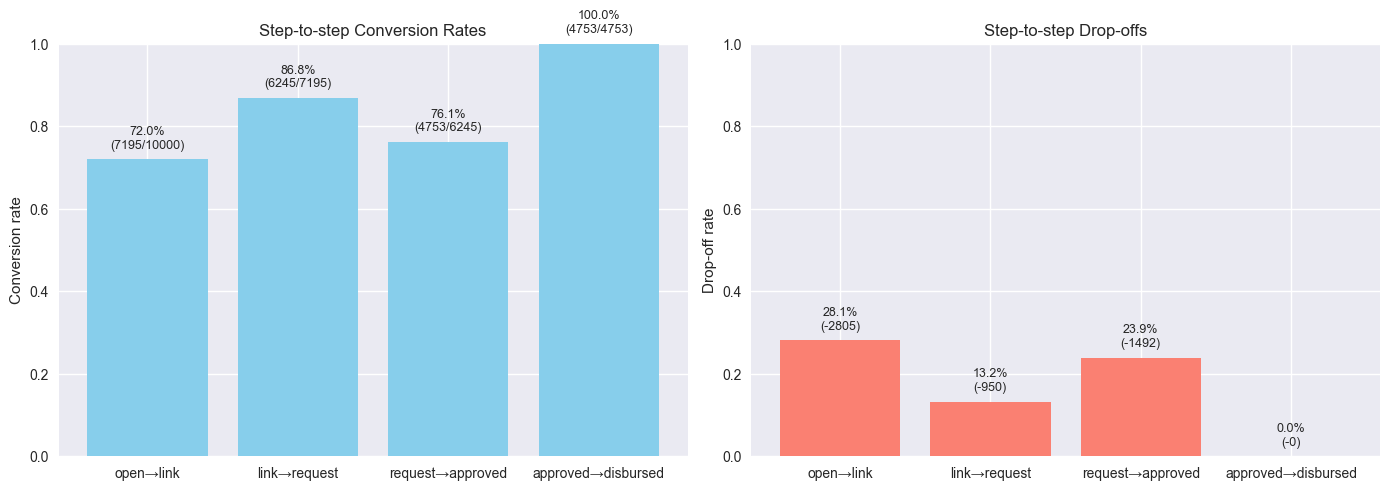

In [17]:
import matplotlib.pyplot as plt

plot_df = overall_df.iloc[:4].copy()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# --- Left: Conversion rates ---
bars1 = axes[0].bar(plot_df['step'], plot_df['conversion_rate'], color='skyblue')
axes[0].set_ylim(0,1)
axes[0].set_ylabel("Conversion rate")
axes[0].set_title("Step-to-step Conversion Rates")
for bar, conv, from_cnt, to_cnt in zip(bars1, plot_df['conversion_rate'], plot_df['from_cnt'], plot_df['to_cnt']):
    axes[0].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.02,
                 f"{conv:.1%}\n({int(to_cnt)}/{int(from_cnt)})",
                 ha='center', va='bottom', fontsize=9)

# --- Right: Drop-off rates ---
bars2 = axes[1].bar(plot_df['step'], plot_df['dropoff_rate'], color='salmon')
axes[1].set_ylim(0,1)
axes[1].set_ylabel("Drop-off rate")
axes[1].set_title("Step-to-step Drop-offs")
for bar, drop_rate, drop_cnt in zip(bars2, plot_df['dropoff_rate'], plot_df['dropoff_count']):
    axes[1].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.02,
                 f"{drop_rate:.1%}\n(-{int(drop_cnt)})",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### P75 Incremental Disbursement

P75 Incremental Disbursement
This shows the increment in disbursements if the bottom 75% of segments were lifted to the conversion rates of the top 25% (P75 benchmark). This is a reasonable assumption because those higher conversion rates are already being achieved by some segments today, making them a practical best-practice target rather than a theoretical maximum.

Under this lens, the largest lever is linkâ†’request, followed by requestâ†’approved, and then openâ†’link. The approvedâ†’disbursed step has little to no headroom.

Focus areas:

Linkâ†’request â€“ address pricing/tip/fee shock and UX clarity.

Requestâ†’approved â€“ refine approval policy and risk modeling, especially for weaker segments.

Openâ†’link â€“ improve bank-link reliability and user trust (e.g., Flinks coverage, latency, security cues).

In [18]:
p75_levers_sql = """
-- 1) Collapse to segment-level totals (ignore signup_month/year)
WITH seg_tot AS (
  SELECT
    province,
    device_os,
    acquisition_channel,
    SUM(app_open_users)    AS n1,  -- open
    SUM(bank_linked_users) AS n2,  -- link
    SUM(requested_users)   AS n3,  -- request
    SUM(approved_users)    AS n4,  -- approved
    SUM(disbursed_users)   AS n5   -- disbursed
  FROM v_funnel_by_segment
  GROUP BY 1,2,3
),

-- 2) Compute guarded step rates per segment
seg AS (
  SELECT
    province, device_os, acquisition_channel,
    n1, n2, n3, n4, n5,
    GREATEST(0.0, LEAST(n2::DOUBLE/NULLIF(n1,0), 1.0)) AS r12,
    GREATEST(0.0, LEAST(n3::DOUBLE/NULLIF(n2,0), 1.0)) AS r23,
    GREATEST(0.0, LEAST(n4::DOUBLE/NULLIF(n3,0), 1.0)) AS r34,
    GREATEST(0.0, LEAST(n5::DOUBLE/NULLIF(n4,0), 1.0)) AS r45
  FROM seg_tot
),

-- 3) P75 targets across segments (cap at 0.95)
p75 AS (
  SELECT
    quantile_cont(r12, 0.75) AS p75_r12,
    quantile_cont(r23, 0.75) AS p75_r23,
    quantile_cont(r34, 0.75) AS p75_r34,
    quantile_cont(r45, 0.75) AS p75_r45
  FROM seg
),
targets AS (
  SELECT
    LEAST(p75_r12, 0.95) AS t12,
    LEAST(p75_r23, 0.95) AS t23,
    LEAST(p75_r34, 0.95) AS t34,
    LEAST(p75_r45, 0.95) AS t45
  FROM p75
),

-- 4) Simulate one-step lift to target, holding downstream rates constant
opps AS (
  -- openâ†’link
  SELECT 'openâ†’link' AS step, s.*,
         (s.n1 * t.t12)                       AS n2p,
         (s.n1 * t.t12 * s.r23)               AS n3p,
         (s.n1 * t.t12 * s.r23 * s.r34)       AS n4p,
         (s.n1 * t.t12 * s.r23 * s.r34 * s.r45) AS n5p
  FROM seg s CROSS JOIN targets t
  UNION ALL
  -- linkâ†’request
  SELECT 'linkâ†’request', s.*,
         s.n2,
         (s.n2 * t.t23),
         (s.n2 * t.t23 * s.r34),
         (s.n2 * t.t23 * s.r34 * s.r45)
  FROM seg s CROSS JOIN targets t
  UNION ALL
  -- requestâ†’approved
  SELECT 'requestâ†’approved', s.*,
         s.n2,
         s.n3,
         (s.n3 * t.t34),
         (s.n3 * t.t34 * s.r45)
  FROM seg s CROSS JOIN targets t
  UNION ALL
  -- approvedâ†’disbursed
  SELECT 'approvedâ†’disbursed', s.*,
         s.n2,
         s.n3,
         s.n4,
         (s.n4 * t.t45)
  FROM seg s CROSS JOIN targets t
),

-- 5) Per-segment impact + normalization
by_segment AS (
  SELECT
    step,
    province, device_os, acquisition_channel,
    n1, n2, n3, n4, n5,
    r12, r23, r34, r45,
    n5p,
    GREATEST(0.0, n5p - n5) AS incremental_disbursed
  FROM opps
  WHERE n1 > 0
),

-- 6) Aggregate to overall step impact
summary AS (
  SELECT
    step,
    SUM(incremental_disbursed) AS incremental_disbursed_dataset,
    SUM(n1)                    AS open_cnt_sum
  FROM by_segment
  GROUP BY 1
)

-- 7) Final output
SELECT
  step,
  ROUND(incremental_disbursed_dataset, 3)                                       AS incremental_disbursed_dataset,
  ROUND(incremental_disbursed_dataset / NULLIF(open_cnt_sum,0) * 1000, 3)       AS incremental_per_1k_opens
FROM summary
ORDER BY incremental_disbursed_dataset DESC;
"""

p75_levers_df = conn.execute(p75_levers_sql).fetchdf()
display(p75_levers_df)


step  incremental_disbursed_dataset  incremental_per_1k_opens
0        linkâ†’request                        514.590                    51.459
1    requestâ†’approved                        384.182                    38.418
2           openâ†’link                        218.996                    21.900
3  approvedâ†’disbursed                          0.000                     0.000

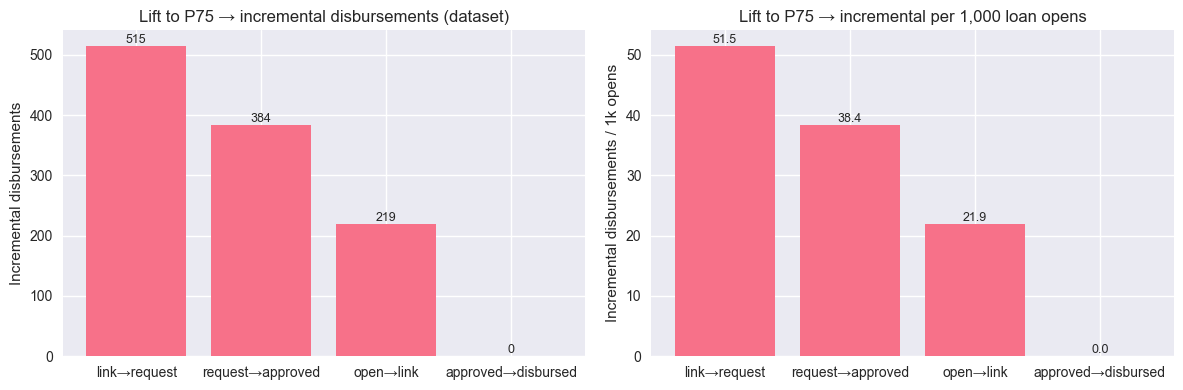

In [19]:
import matplotlib.pyplot as plt

plot_df = p75_levers_df.copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: total incremental disbursements (dataset scope)
axes[0].bar(plot_df["step"], plot_df["incremental_disbursed_dataset"])
axes[0].set_title("Lift to P75 â†’ incremental disbursements (dataset)")
axes[0].set_ylabel("Incremental disbursements")
for i, v in enumerate(plot_df["incremental_disbursed_dataset"]):
    axes[0].text(i, v, f"{v:.0f}", ha='center', va='bottom', fontsize=9)

# Right: normalized per 1k opens
axes[1].bar(plot_df["step"], plot_df["incremental_per_1k_opens"])
axes[1].set_title("Lift to P75 â†’ incremental per 1,000 loan opens")
axes[1].set_ylabel("Incremental disbursements / 1k opens")
for i, v in enumerate(plot_df["incremental_per_1k_opens"]):
    axes[1].text(i, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Top 3 friction points (by incremental disbursements if lifted to P75 targets*)

The biggest incremental gains come from Ontario Â· Organic segments. Specifically:

Requestâ†’Approved (ON Â· Android Â· Organic): +54 disbursements (~62 per 1k opens)

Linkâ†’Request (ON Â· iOS Â· Organic): +47 disbursements (~55 per 1k opens)

Linkâ†’Request (ON Â· Android Â· Organic): +37 disbursements (~43 per 1k opens)

ðŸ‘‰ This shows that approval policy/modeling and linkâ†’request UX/fee clarity are the most critical levers to unlock additional disbursements.

In [20]:
top3_p75_sql = """
-- 1) Collapse to segment-level totals (ignore cohort fields)
WITH seg_tot AS (
  SELECT
    province,
    device_os,
    acquisition_channel,
    SUM(app_open_users)    AS n1,  -- open
    SUM(bank_linked_users) AS n2,  -- link
    SUM(requested_users)   AS n3,  -- request
    SUM(approved_users)    AS n4,  -- approved
    SUM(disbursed_users)   AS n5   -- disbursed
  FROM v_funnel_by_segment
  GROUP BY 1,2,3
),

-- 2) Compute guarded step rates per segment
seg AS (
  SELECT
    province, device_os, acquisition_channel,
    n1, n2, n3, n4, n5,
    GREATEST(0.0, LEAST(n2::DOUBLE/NULLIF(n1,0), 1.0)) AS r12,
    GREATEST(0.0, LEAST(n3::DOUBLE/NULLIF(n2,0), 1.0)) AS r23,
    GREATEST(0.0, LEAST(n4::DOUBLE/NULLIF(n3,0), 1.0)) AS r34,
    GREATEST(0.0, LEAST(n5::DOUBLE/NULLIF(n4,0), 1.0)) AS r45
  FROM seg_tot
),

-- 3) P75 targets (cap at 0.95)
p75 AS (
  SELECT
    quantile_cont(r12, 0.75) AS p75_r12,
    quantile_cont(r23, 0.75) AS p75_r23,
    quantile_cont(r34, 0.75) AS p75_r34,
    quantile_cont(r45, 0.75) AS p75_r45
  FROM seg
),
targets AS (
  SELECT
    LEAST(p75_r12, 0.95) AS t12,
    LEAST(p75_r23, 0.95) AS t23,
    LEAST(p75_r34, 0.95) AS t34,
    LEAST(p75_r45, 0.95) AS t45
  FROM p75
),

-- 4) Simulate one-step lift to target (downstream rates held constant)
opps AS (
  -- openâ†’link
  SELECT 'openâ†’link' AS step, s.*,
         (s.n1 * t.t12 * s.r23 * s.r34 * s.r45) AS n5p
  FROM seg s CROSS JOIN targets t
  UNION ALL
  -- linkâ†’request
  SELECT 'linkâ†’request', s.*,
         (s.n2 * t.t23 * s.r34 * s.r45) AS n5p
  FROM seg s CROSS JOIN targets t
  UNION ALL
  -- requestâ†’approved
  SELECT 'requestâ†’approved', s.*,
         (s.n3 * t.t34 * s.r45) AS n5p
  FROM seg s CROSS JOIN targets t
  UNION ALL
  -- approvedâ†’disbursed
  SELECT 'approvedâ†’disbursed', s.*,
         (s.n4 * t.t45) AS n5p
  FROM seg s CROSS JOIN targets t
),

-- 5) Rank impacts
ranked AS (
  SELECT
    step,
    province, device_os, acquisition_channel,
    n1, n5, n5p,
    GREATEST(0.0, n5p - n5) AS incremental_disbursed,
    CASE WHEN n1>0 THEN (n5p - n5)/n1*1000 ELSE 0 END AS incremental_per_1k_opens
  FROM opps
)
SELECT
  step,
  province, device_os, acquisition_channel,
  ROUND(incremental_disbursed, 3)      AS incremental_disbursed,
  ROUND(incremental_per_1k_opens, 3)   AS incremental_per_1k_opens
FROM ranked
ORDER BY incremental_disbursed DESC
LIMIT 3;
"""

top3_df = conn.execute(top3_p75_sql).fetchdf()
display(top3_df)


step province device_os acquisition_channel  \
0  requestâ†’approved       ON   android             organic   
1      linkâ†’request       ON       ios             organic   
2      linkâ†’request       ON   android             organic   

   incremental_disbursed  incremental_per_1k_opens  
0                 53.727                    62.184  
1                 46.590                    54.556  
2                 36.999                    42.823

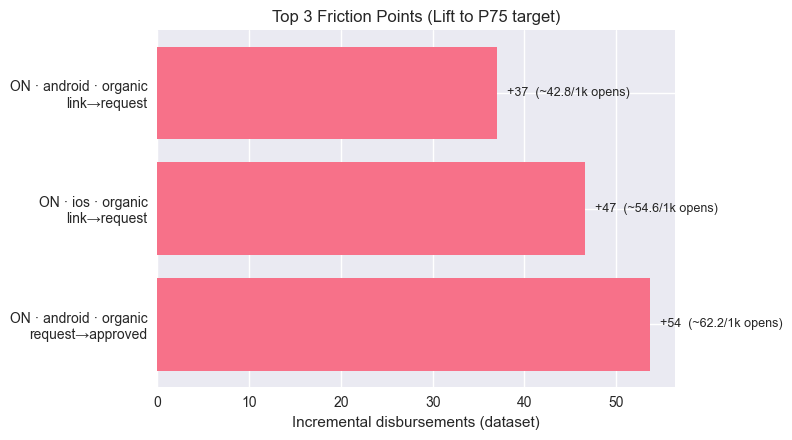

In [21]:
import matplotlib.pyplot as plt

plot_df = top3_df.copy()
plot_df["label"] = (
    plot_df["province"] + " Â· " + plot_df["device_os"] + " Â· " +
    plot_df["acquisition_channel"] + "\n" + plot_df["step"]
)

fig, ax = plt.subplots(figsize=(8,4.5))
bars = ax.barh(plot_df["label"], plot_df["incremental_disbursed"])

ax.set_xlabel("Incremental disbursements (dataset)")
ax.set_title("Top 3 Friction Points (Lift to P75 target)")

for bar, inc, per1k in zip(bars, plot_df["incremental_disbursed"], plot_df["incremental_per_1k_opens"]):
    ax.text(bar.get_width()+max(plot_df["incremental_disbursed"])*0.02,
            bar.get_y()+bar.get_height()/2,
            f"+{inc:.0f}  (~{per1k:.1f}/1k opens)",
            va='center', fontsize=9)

plt.tight_layout()
plt.show()


### Interesting Insight I came across
One interesting insight is around the Email channel. Customers acquired via email show the lowest linkâ†’request conversion (82.7%) but the highest requestâ†’approval conversion (79%). This suggests Breeâ€™s risk model views email customers as less risky, and the targeting works well compared to other channels. However, many of these customers donâ€™t proceed to request a loan even after linking their bank, likely because the loan amounts offered are too low to be attractive.

In [22]:
sql_by_channel = """
WITH agg AS (
  SELECT
    acquisition_channel,
    SUM(bank_linked_users)   AS link_cnt,
    SUM(requested_users)     AS request_cnt,
    SUM(approved_users)      AS approved_cnt
  FROM v_funnel_by_segment
  GROUP BY 1
)
SELECT
  acquisition_channel,
  -- link â†’ request
  request_cnt                                           AS requests,
  link_cnt                                              AS bank_links,
  CASE WHEN link_cnt > 0 THEN request_cnt::DOUBLE / link_cnt ELSE 0 END
    AS r_link_to_request,
  -- request â†’ approved
  approved_cnt                                          AS approvals,
  CASE WHEN request_cnt > 0 THEN approved_cnt::DOUBLE / request_cnt ELSE 0 END
    AS r_request_to_approved
FROM agg
ORDER BY r_request_to_approved DESC, r_link_to_request DESC;
"""

by_channel = conn.execute(sql_by_channel).fetchdf()
display(by_channel)


acquisition_channel  requests  bank_links  r_link_to_request  approvals  \
0               email     287.0       347.0           0.827089      227.0   
1         paid_search     778.0       887.0           0.877114      598.0   
2             organic    2801.0      3252.0           0.861316     2147.0   
3           affiliate     650.0       738.0           0.880759      498.0   
4         paid_social    1096.0      1252.0           0.875399      828.0   
5            referral     633.0       719.0           0.880389      455.0   

   r_request_to_approved  
0               0.790941  
1               0.768638  
2               0.766512  
3               0.766154  
4               0.755474  
5               0.718799

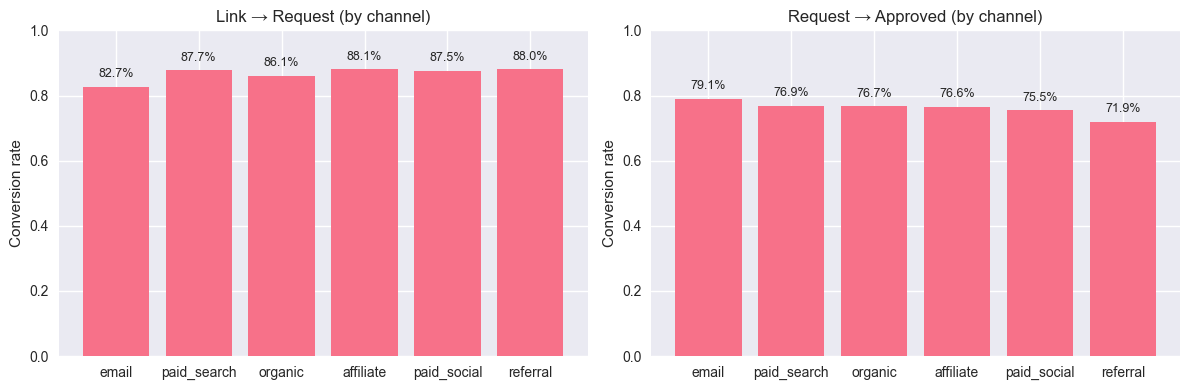

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].bar(by_channel["acquisition_channel"], by_channel["r_link_to_request"])
axes[0].set_title("Link â†’ Request (by channel)")
axes[0].set_ylabel("Conversion rate")
axes[0].set_ylim(0,1)
for i, v in enumerate(by_channel["r_link_to_request"]):
    axes[0].text(i, v+0.02, f"{v:.1%}", ha="center", va="bottom", fontsize=9)

axes[1].bar(by_channel["acquisition_channel"], by_channel["r_request_to_approved"])
axes[1].set_title("Request â†’ Approved (by channel)")
axes[1].set_ylabel("Conversion rate")
axes[1].set_ylim(0,1)
for i, v in enumerate(by_channel["r_request_to_approved"]):
    axes[1].text(i, v+0.02, f"{v:.1%}", ha="center", va="bottom", fontsize=9)

plt.tight_layout(); plt.show()


# Conversion - Cohort by signup month

In [24]:
cohort_sql = """
WITH coh AS (
  SELECT
    signup_year,
    signup_month,
    SUM(app_open_users)      AS open_cnt,
    SUM(bank_linked_users)   AS link_cnt,
    SUM(requested_users)     AS request_cnt,
    SUM(approved_users)      AS approved_cnt,
    SUM(disbursed_users)     AS disbursed_cnt
  FROM v_funnel_by_segment
  GROUP BY signup_year, signup_month
)
SELECT
  signup_year,
  signup_month,
  open_cnt, link_cnt, request_cnt, approved_cnt, disbursed_cnt,
  CASE WHEN open_cnt>0     THEN link_cnt::DOUBLE/open_cnt     ELSE 0 END AS r_open_to_link,
  CASE WHEN link_cnt>0     THEN request_cnt::DOUBLE/link_cnt  ELSE 0 END AS r_link_to_request,
  CASE WHEN request_cnt>0  THEN approved_cnt::DOUBLE/request_cnt ELSE 0 END AS r_request_to_approved,
  CASE WHEN approved_cnt>0 THEN disbursed_cnt::DOUBLE/approved_cnt ELSE 0 END AS r_approved_to_disbursed,
  CASE WHEN open_cnt>0     THEN disbursed_cnt::DOUBLE/open_cnt ELSE 0 END AS r_open_to_disbursed
FROM coh
ORDER BY signup_year, signup_month;
"""

cohort_df = conn.execute(cohort_sql).fetchdf()
display(cohort_df.head())


signup_year  signup_month  open_cnt  link_cnt  request_cnt  approved_cnt  \
0         2024            12      49.0      35.0         32.0          22.0   
1         2025             1    1464.0    1044.0       1009.0         804.0   
2         2025             2    1308.0     910.0        907.0         699.0   
3         2025             3    1474.0    1074.0        984.0         746.0   
4         2025             4    1444.0    1047.0       1030.0         802.0   

   disbursed_cnt  r_open_to_link  r_link_to_request  r_request_to_approved  \
0           22.0        0.714286           0.914286               0.687500   
1          804.0        0.713115           0.966475               0.796829   
2          699.0        0.695719           0.996703               0.770673   
3          746.0        0.728630           0.916201               0.758130   
4          802.0        0.725069           0.983763               0.778641   

   r_approved_to_disbursed  r_open_to_disbursed  
0                      1.0             0.448980  
1                      1.0             0.549180  
2                      1.0             0.534404  
3                      1.0             0.506106  
4                      1.0             0.555402

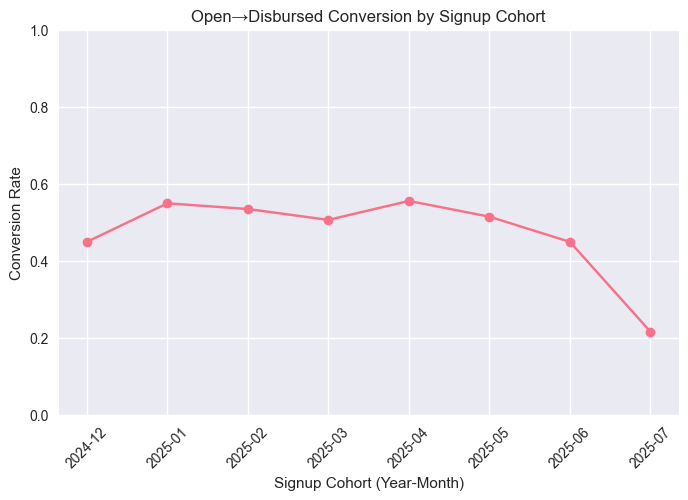

In [25]:
import matplotlib.pyplot as plt

# Create year-month label for x-axis
cohort_df["signup_period"] = cohort_df["signup_year"].astype(str) + "-" + cohort_df["signup_month"].astype(str).str.zfill(2)

plt.figure(figsize=(8,5))
plt.plot(cohort_df["signup_period"], cohort_df["r_open_to_disbursed"], marker="o")
plt.title("Openâ†’Disbursed Conversion by Signup Cohort")
plt.xlabel("Signup Cohort (Year-Month)")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()


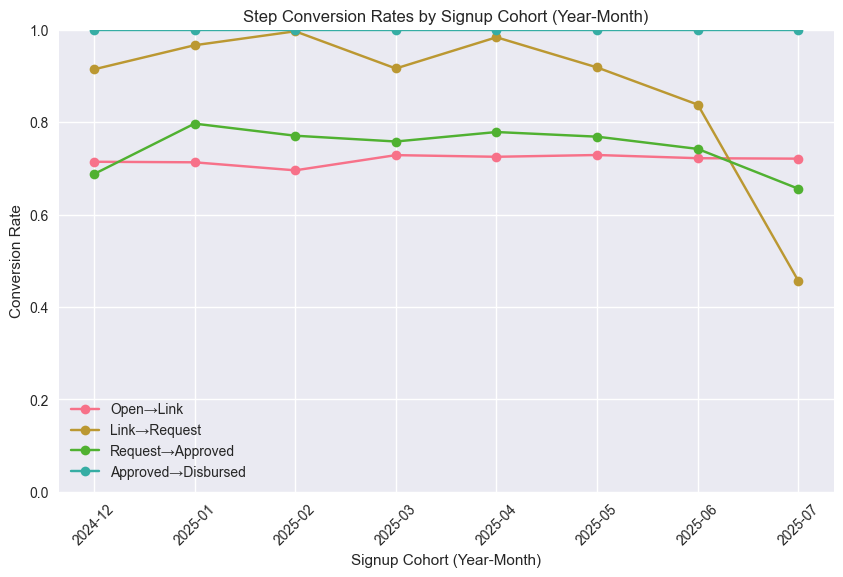

In [26]:
# Create year-month label if not already in the dataframe
cohort_df["signup_period"] = (
    cohort_df["signup_year"].astype(str) + "-" +
    cohort_df["signup_month"].astype(str).str.zfill(2)
)

steps = [
    ("r_open_to_link", "Openâ†’Link"),
    ("r_link_to_request", "Linkâ†’Request"),
    ("r_request_to_approved", "Requestâ†’Approved"),
    ("r_approved_to_disbursed", "Approvedâ†’Disbursed"),
]

plt.figure(figsize=(10,6))
for col, label in steps:
    plt.plot(cohort_df["signup_period"], cohort_df[col], marker="o", label=label)

plt.title("Step Conversion Rates by Signup Cohort (Year-Month)")
plt.xlabel("Signup Cohort (Year-Month)")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend()
plt.show()


Because only linkâ†’request conversion moves, while the other steps are flat, this points to a product change around the request flow rather than user mix or external seasonality.

Examples: changes in how loan amounts, tips, or fees were presented; a new UI step before request; or stricter criteria shown earlier in the flow.

The effect was negative, cutting openâ†’disbursed conversion in half.

In [27]:
conn.close()